# Análisis numérico eficiente con python

### Temas
- La biblioteca **NumPy**
- Qué son los *Arrays*.
- Métodos aplicables entre *arrays*.
- Operaciones entre *arrays*.
- Generacién de números aleatorios y reproductibilidad.

## Presentacion del problema
* Precio de manzanas en 5 ciudades rusas durante un periodo de 7 años y 3 meses.
* Basados en un dataset de https://www.kaggle.com/datasets/kapatsa/apple-prices-in-russian-regions

### Herramienta utilizada
* Numpy
    - Trabaja con una estructura llamada array.
    - Objeto que almacena un conjunto de datos homogéneos (todos del mismo tipo y relacionados)
    - Las operaciones matemáticas son mucho más rápidas
    - Menor uso de memoria
    - Diversos métodos para su utilización.

## 01. Conociendo Numpy

In [1]:
import numpy as np

In [2]:
url = 'manzanas.csv'
url2 = 'https://gist.githubusercontent.com/ahcamachod/41b8a65c5e5b58125401deafb68af460/raw/f84320f69efa1cc3e86e1db054422cfa4869c63e/manzanas.csv'

In [3]:
# 12(meses) x 7(años) + 3(meses) = 87
# 1 porque salto la primera columna (año)
np.arange(1, 88, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87])

In [4]:
# accedo a los datos sin la primera columna (año)
datos = np.loadtxt(url, delimiter=',', usecols= np.arange(1, 88, 1))

### Métodos básicos par explorar Arrays

In [5]:
datos.ndim #-> numero de dimensiones

2

In [6]:
datos.shape #-> tupla con las dimensiones

(6, 87)

In [7]:
datos_transpuestos = datos.T #-> transpuesta(convertir filas en columnas y viceversa)

In [8]:
# Ejercicio: Obteniendo dimensiones

url_ejercicio = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/bytebank.csv'
dato = np.loadtxt(url_ejercicio, delimiter=',', skiprows=1, dtype=float)
# cualquiera de las dos formas funciona
dato.shape 
np.shape(dato)

(12, 2)

## 02. Exploracion de datos

In [77]:
# datos a utilizar:
# Kaggle: https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit
# GitHub: https://gist.githubusercontent.com/ahcamachod/9be09de793dc3bf1e6c3d98eb4e5b1ef/raw/21b85572693200040e11284ef6dcfc3457ec8e11/citrus.csv

In [9]:
# Visualizacion y Seleccion

fechas = datos_transpuestos[:, 0]  # todas las filas, columna 0
fechas

array([ 1.2013,  2.2013,  3.2013,  4.2013,  5.2013,  6.2013,  7.2013,
        8.2013,  9.2013, 10.2013, 11.2013, 12.2013,  1.2014,  2.2014,
        3.2014,  4.2014,  5.2014,  6.2014,  7.2014,  8.2014,  9.2014,
       10.2014, 11.2014, 12.2014,  1.2015,  2.2015,  3.2015,  4.2015,
        5.2015,  6.2015,  7.2015,  8.2015,  9.2015, 10.2015, 11.2015,
       12.2015,  1.2016,  2.2016,  3.2016,  4.2016,  5.2016,  6.2016,
        7.2016,  8.2016,  9.2016, 10.2016, 11.2016, 12.2016,  1.2017,
        2.2017,  3.2017,  4.2017,  5.2017,  6.2017,  7.2017,  8.2017,
        9.2017, 10.2017, 11.2017, 12.2017,  1.2018,  2.2018,  3.2018,
        4.2018,  5.2018,  6.2018,  7.2018,  8.2018,  9.2018, 10.2018,
       11.2018, 12.2018,  1.2019,  2.2019,  3.2019,  4.2019,  5.2019,
        6.2019,  7.2019,  8.2019,  9.2019, 10.2019, 11.2019, 12.2019,
        1.202 ,  2.202 ,  3.202 ])

In [10]:
precios = datos_transpuestos[:, 1:]  # todas las filas, columnas desde la 1 en adelante
precios

array([[ 79.72,  42.67,  62.55,  48.26,  71.25],
       [ 81.08,  44.37,  62.73,  51.01,  71.35],
       [ 79.68,  44.73,  63.43,  50.91,  70.9 ],
       [ 79.8 ,  46.75,  63.83,  53.94,  71.92],
       [ 80.63,    nan,  66.06,  61.27,  72.91],
       [ 80.8 ,  51.59,  69.22,  65.44,  74.39],
       [ 80.28,  57.8 ,  72.07,  56.51,  73.1 ],
       [ 78.99,  62.14,  69.31,  53.  ,  70.24],
       [ 76.77,  56.76,  65.18,  43.87,  69.12],
       [ 76.09,  50.85,  62.13,  42.12,  68.98],
       [ 76.36,  46.43,  64.17,  43.98,  68.58],
       [ 77.16,  46.73,  65.5 ,  44.66,  69.5 ],
       [ 77.5 ,  45.85,  66.85,  47.73,  70.14],
       [ 79.03,  49.25,  68.38,  52.31,  70.58],
       [ 80.28,  48.14,  68.77,  56.8 ,  70.78],
       [ 80.05,  49.18,  69.32,  51.15,  72.78],
       [ 78.11,  49.49,  69.77,  54.63,  72.84],
       [ 76.9 ,  49.83,  70.17,  55.8 ,  74.74],
       [ 77.68,  49.14,  70.76,  57.31,  76.43],
       [ 76.05,  63.21,  75.16,  53.81,  81.2 ],
       [ 75.53,  61.

In [11]:
import matplotlib.pyplot as plt

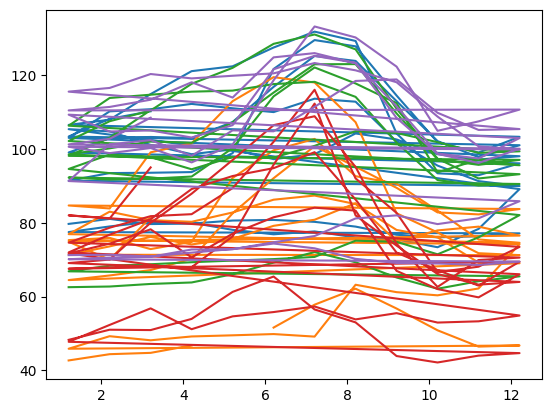

In [12]:
plt.plot(fechas, precios)
#al tener las fechas como num decimal, como 1,2013 2,2013, etc, matplotlib no las interpreta bien en el eje x

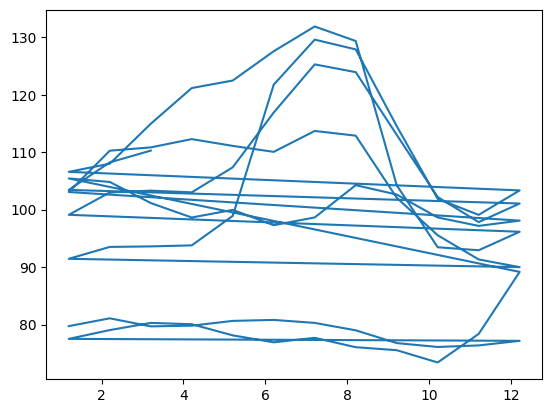

In [13]:
plt.plot(fechas, precios[:,0])#todas las filas de una misma ciudad(moscu)

In [14]:
fechas = np.arange(1, 88, 1) #fecha que comienza en 1 hasta 87

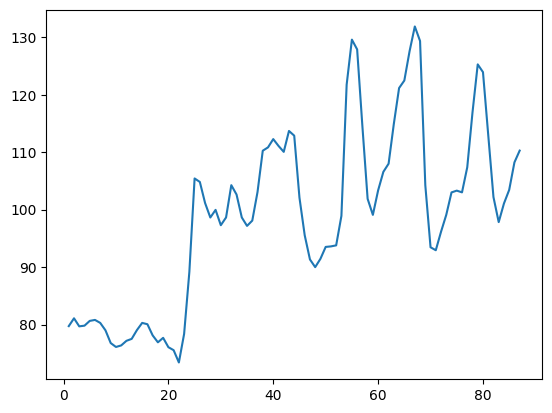

In [15]:
plt.plot(fechas, precios[:,0])

In [16]:
#almaceno los precios de cada ciudad donde 0-4 son las columnas de los precios
Moscu = precios[:, 0]
Kaliningrado = precios[:, 1]
Petersburgo = precios[:, 2]
Krasnodar = precios[:, 3]
Ekaterimburgo = precios[:, 4]

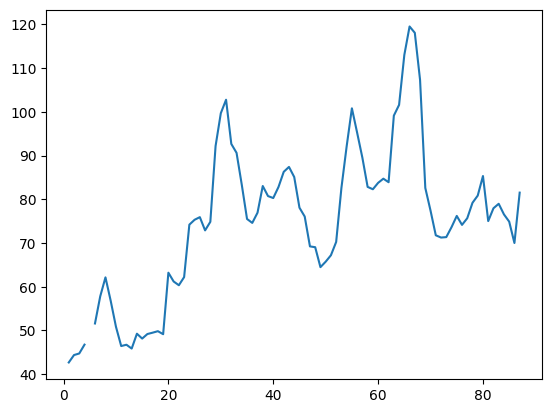

In [17]:
plt.plot(fechas, Kaliningrado)

In [18]:
# Ejercicio: Seleccion de un intervalo
clientes = np.array([[1, 'Juan', 30, 'Calle A', 100, 'electrónicos'],
                     [2, 'Maria', 25, 'Calle B', 200, 'moda'],
                     [3, 'Pedro', 35, 'Calle C', 50, 'deportes']])
# ej: de intervalos
clientes[:, 0]   # id de los clientes
clientes[:, 5]   # categoria de productos preferida

#crear una matriz intencion_compras para almacenar solo las dos ultimas columnas
intencion_compras = clientes[:, 4:6] # monto gastado y categoria de productos preferida(6 para que tome hasta el 5)
intencion_compras = clientes[:, 4:]

In [19]:
# Comparacion entre arrays
Moscu.shape #-> tiene 87 meses(ocurrencias)
#almaceno los 4 primeros años de datos de Moscu
moscu_1 = Moscu[0: 12]
moscu_2 = Moscu[12: 24]
moscu_3 = Moscu[24: 36]
moscu_4 = Moscu[36: 48]

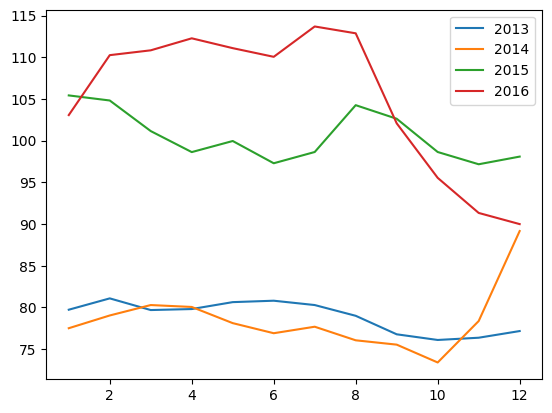

In [20]:
plt.plot(np.arange(1, 13, 1), moscu_1)
plt.plot(np.arange(1, 13, 1), moscu_2)
plt.plot(np.arange(1, 13, 1), moscu_3)
plt.plot(np.arange(1, 13, 1), moscu_4)
plt.legend(['2013', '2014', '2015', '2016'])

In [21]:
#comparar dos arrays
np.array_equal(moscu_1, moscu_2)

False

In [22]:
np.allclose(moscu_1, moscu_2, 5) #->compara si son iguales pero con una tolerancia

True

In [23]:
# Tratamiento de Nan

np.mean(Kaliningrado) #-> valor promedio, pero en el caso de Kaliningrado no funciona porque tiene Nan

np.float64(nan)

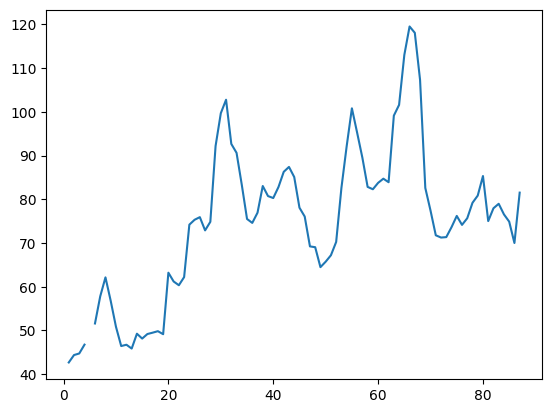

In [24]:
plt.plot(fechas, Kaliningrado)

In [25]:
Kaliningrado

array([ 42.67,  44.37,  44.73,  46.75,    nan,  51.59,  57.8 ,  62.14,
        56.76,  50.85,  46.43,  46.73,  45.85,  49.25,  48.14,  49.18,
        49.49,  49.83,  49.14,  63.21,  61.2 ,  60.34,  62.2 ,  74.2 ,
        75.32,  75.92,  72.89,  74.85,  92.19,  99.7 , 102.78,  92.67,
        90.63,  83.31,  75.5 ,  74.6 ,  76.94,  83.04,  80.74,  80.29,
        82.82,  86.29,  87.41,  85.1 ,  78.08,  76.06,  69.23,  69.04,
        64.48,  65.73,  67.2 ,  70.25,  82.59,  92.12, 100.82,  95.23,
        89.51,  82.84,  82.3 ,  83.76,  84.72,  83.91,  99.14, 101.6 ,
       113.03, 119.54, 118.09, 107.32,  82.6 ,  77.4 ,  71.77,  71.25,
        71.35,  73.62,  76.2 ,  74.15,  75.67,  79.2 ,  80.85,  85.33,
        75.02,  77.95,  78.98,  76.55,  74.89,  70.  ,  81.53])

In [26]:
np.isnan(Kaliningrado)

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [27]:
np.sum(np.isnan(Kaliningrado)) #-> cuento todos los valores Nan que tengo

np.int64(1)

In [28]:
#busco obtener el posible valor del Nan en Kaliningrado promediando los valores anterior y posterior
Kaliningrado[4] = (Kaliningrado[3] + Kaliningrado[5]) / 2

In [29]:
np.sum(np.isnan(Kaliningrado))

np.int64(0)

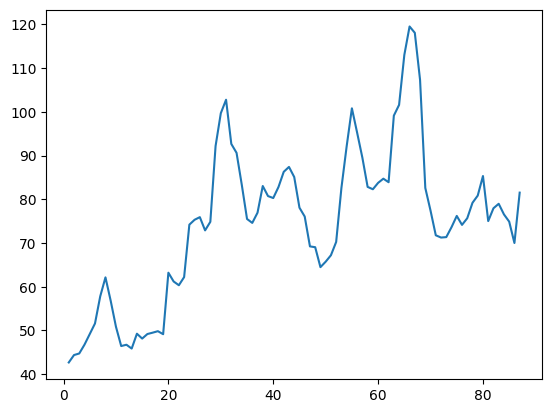

In [30]:
plt.plot(fechas, Kaliningrado)

In [31]:
#finalmente obtengo el promedio de Kaliningrado sin Nan
np.mean(Kaliningrado)

np.float64(74.5506896551724)

### Ejercicio: Diferencia en un intervalo
    Para validar si el sensor sigue calibrado, 
     necesita que la diferencia entre los valores en las posiciones de una matriz llamada "base" y 
     una columna de la matriz "medidas" sea menor que 0.01.

```python
    np.allclose(base, medidas[:, 0], 0.01)
```

### Ejercicio: Determinando el numero de Nans
```python
    sum(np.isnan(Kaliningrado))
    np.sum(np.isnan(Kaliningrado))
```

## 03. Operaciones entre arrays

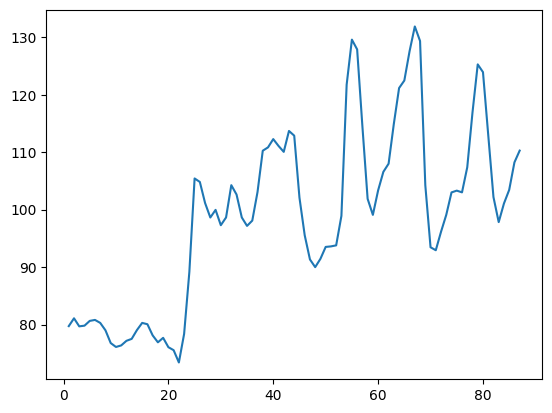

In [32]:
# Diferencia entre arrays

plt.plot(fechas, Moscu)

### **y = ax + b**  ecuacion de la recta

In [33]:
x = fechas
y = 1.5 * x + 78

In [34]:
y

array([ 79.5,  81. ,  82.5,  84. ,  85.5,  87. ,  88.5,  90. ,  91.5,
        93. ,  94.5,  96. ,  97.5,  99. , 100.5, 102. , 103.5, 105. ,
       106.5, 108. , 109.5, 111. , 112.5, 114. , 115.5, 117. , 118.5,
       120. , 121.5, 123. , 124.5, 126. , 127.5, 129. , 130.5, 132. ,
       133.5, 135. , 136.5, 138. , 139.5, 141. , 142.5, 144. , 145.5,
       147. , 148.5, 150. , 151.5, 153. , 154.5, 156. , 157.5, 159. ,
       160.5, 162. , 163.5, 165. , 166.5, 168. , 169.5, 171. , 172.5,
       174. , 175.5, 177. , 178.5, 180. , 181.5, 183. , 184.5, 186. ,
       187.5, 189. , 190.5, 192. , 193.5, 195. , 196.5, 198. , 199.5,
       201. , 202.5, 204. , 205.5, 207. , 208.5])

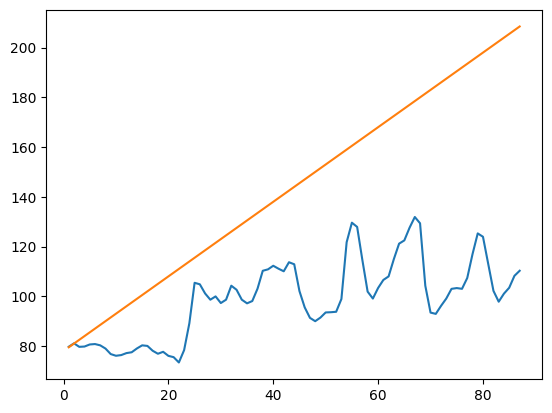

In [35]:
plt.plot(fechas, Moscu)
plt.plot(x, y)

In [36]:
Moscu - y

array([ 2.2000e-01,  8.0000e-02, -2.8200e+00, -4.2000e+00, -4.8700e+00,
       -6.2000e+00, -8.2200e+00, -1.1010e+01, -1.4730e+01, -1.6910e+01,
       -1.8140e+01, -1.8840e+01, -2.0000e+01, -1.9970e+01, -2.0220e+01,
       -2.1950e+01, -2.5390e+01, -2.8100e+01, -2.8820e+01, -3.1950e+01,
       -3.3970e+01, -3.7610e+01, -3.4140e+01, -2.4840e+01, -1.0070e+01,
       -1.2180e+01, -1.7350e+01, -2.1370e+01, -2.1540e+01, -2.5710e+01,
       -2.5860e+01, -2.1740e+01, -2.4870e+01, -3.0360e+01, -3.3330e+01,
       -3.3910e+01, -3.0430e+01, -2.4740e+01, -2.5660e+01, -2.5720e+01,
       -2.8400e+01, -3.0940e+01, -2.8800e+01, -3.1120e+01, -4.3420e+01,
       -5.1460e+01, -5.7170e+01, -6.0010e+01, -6.0060e+01, -5.9490e+01,
       -6.0900e+01, -6.2220e+01, -5.8590e+01, -3.7240e+01, -3.0900e+01,
       -3.4100e+01, -4.8950e+01, -6.3120e+01, -6.7410e+01, -6.4650e+01,
       -6.2920e+01, -6.3000e+01, -5.7550e+01, -5.2830e+01, -5.3020e+01,
       -4.9420e+01, -4.6610e+01, -5.0640e+01, -7.7240e+01, -8.95

In [37]:
np.sqrt(np.sum(np.power(Moscu - y, 2)))

np.float64(500.33320307571034)

In [38]:
# ya que la recta esta muy por encima de los valores de Moscu, utilizo un valor menor para la pendiente
x = fechas
y = 0.5 * x + 78

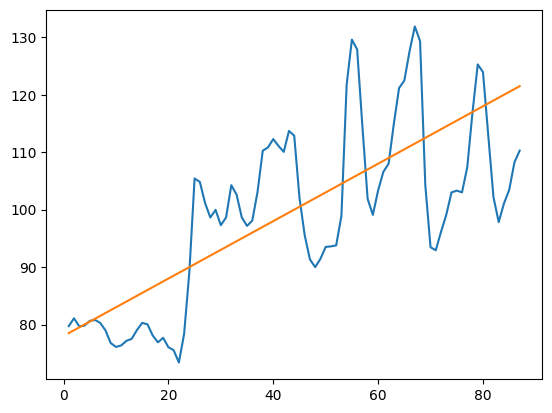

In [39]:
plt.plot(fechas, Moscu)
plt.plot(x, y)

In [40]:
Moscu - y

array([  1.22,   2.08,   0.18,  -0.2 ,   0.13,  -0.2 ,  -1.22,  -3.01,
        -5.73,  -6.91,  -7.14,  -6.84,  -7.  ,  -5.97,  -5.22,  -5.95,
        -8.39, -10.1 ,  -9.82, -11.95, -12.97, -15.61, -11.14,  -0.84,
        14.93,  13.82,   9.65,   6.63,   7.46,   4.29,   5.14,  10.26,
         8.13,   3.64,   1.67,   2.09,   6.57,  13.26,  13.34,  14.28,
        12.6 ,  11.06,  14.2 ,  12.88,   1.58,  -5.46, -10.17, -12.01,
       -11.06,  -9.49,  -9.9 , -10.22,  -5.59,  16.76,  24.1 ,  21.9 ,
         8.05,  -5.12,  -8.41,  -4.65,  -1.92,  -1.  ,   5.45,  11.17,
        11.98,  16.58,  20.39,  17.36,  -8.24, -19.55, -20.57, -17.85,
       -15.4 , -12.  , -12.19, -12.99,  -9.13,  -0.09,   7.79,   5.94,
        -5.47, -16.81, -21.67, -18.93, -17.06, -12.77, -11.22])

In [41]:
np.sum(np.power(Moscu - y, 2))

np.float64(10718.7341)

In [42]:
np.sqrt(np.sum(np.power(Moscu - y, 2)))

np.float64(103.53131941591394)

In [43]:
# de forma equivalente, utilizo la funcion norma de linalg
np.linalg.norm(Moscu - y)

np.float64(103.53131941591394)

#### regresion lineal

### Multiplicacion

$$\alpha = pendiente$$
$$\beta = pendiente$$
$$n = observaciones$$
$$y = precio$$
$$x = fecha$$

La solucion para la pendiente es: 
$$\alpha = \frac{n \sum xy - \sum x \sum y}{n \sum x² -  (\sum x)²} $$

Y para la interseccion: 
$$\beta = \frac{\sum y - \alpha \sum x}{n} $$

Y obtenemos la ecuacion de la recta:
$$y = \alpha x + \beta $$

In [55]:
n = np.size(Moscu)
y = Moscu
x = fechas

$$\alpha = \frac{n \sum xy - \sum x \sum y}{n \sum x² -  (\sum x)²} $$

In [56]:
a = (n*np.sum(x * y) - np.sum(x)*np.sum(y)) / (n*np.sum(x**2) - np.sum(x)**2)

$$\beta = \frac{\sum y - \alpha \sum x}{n} $$

In [57]:
b = np.mean(y) - a*np.mean(x)

In [58]:
print(f'La pendiente es: {a}\nLa interseccion es: {b}')

La pendiente es: 0.43520212145512926
La interseccion es: 79.64892274792834


In [59]:
y = a * x + b
y

array([ 80.08412487,  80.51932699,  80.95452911,  81.38973123,
        81.82493336,  82.26013548,  82.6953376 ,  83.13053972,
        83.56574184,  84.00094396,  84.43614608,  84.87134821,
        85.30655033,  85.74175245,  86.17695457,  86.61215669,
        87.04735881,  87.48256093,  87.91776306,  88.35296518,
        88.7881673 ,  89.22336942,  89.65857154,  90.09377366,
        90.52897578,  90.96417791,  91.39938003,  91.83458215,
        92.26978427,  92.70498639,  93.14018851,  93.57539063,
        94.01059276,  94.44579488,  94.880997  ,  95.31619912,
        95.75140124,  96.18660336,  96.62180548,  97.05700761,
        97.49220973,  97.92741185,  98.36261397,  98.79781609,
        99.23301821,  99.66822033, 100.10342246, 100.53862458,
       100.9738267 , 101.40902882, 101.84423094, 102.27943306,
       102.71463519, 103.14983731, 103.58503943, 104.02024155,
       104.45544367, 104.89064579, 105.32584791, 105.76105004,
       106.19625216, 106.63145428, 107.0666564 , 107.50

In [60]:
np.linalg.norm(Moscu - y)

np.float64(101.7969539992751)

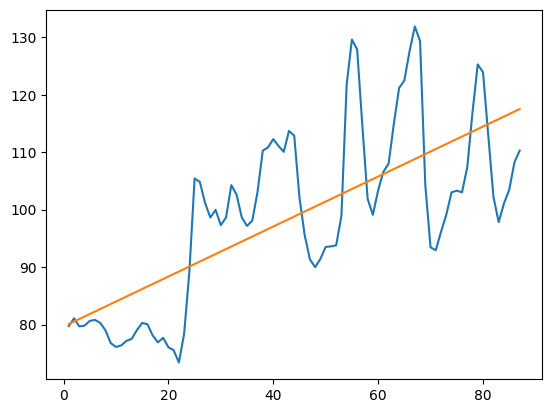

In [61]:
plt.plot(fechas, Moscu)
plt.plot(x, y)

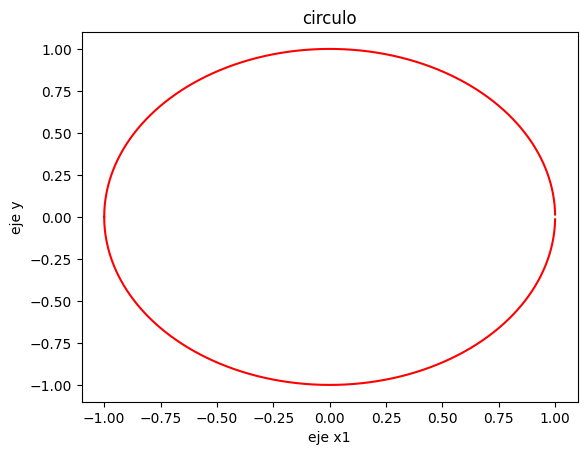

In [62]:
# Ejercicio: Implmentando una ecuacion
#dibujar un circulo
#Para dibujar la parte superior debe usar: y = sqrt(1 - x ^ 2)
#Y para la parte inferior, solo tenía que usar la misma ecuación multiplicada por -1.

x1 = np.arange(-1, 1, 0.0001) 

y1 = np.sqrt(1 - x1**2)
y2 = -np.sqrt(1 - x1**2)

plt.plot(x1, y1, 'r')
plt.plot(x1, y2, 'r')

plt.title("circulo")
plt.xlabel("eje x1")
plt.ylabel("eje y")
plt.show()


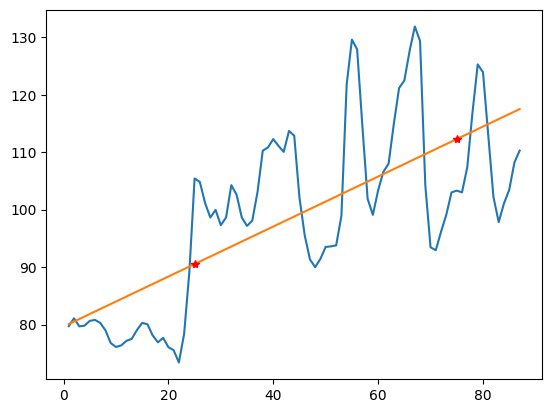

In [67]:
#Aplición de la regresion

plt.plot(fechas, Moscu) 
plt.plot(x, y)
plt.plot(25, a*25+b, '*r') #-> *r estrella roja
plt.plot(75, a*75+b, '*r')

In [ ]:
#el precio de la manzana en el mes 25
a*25+b 

np.float64(90.52897578430657)

In [66]:
a*75+b 

np.float64(112.28908185706302)

### 04 - Números aleatorios

In [68]:
# Generando numeros aleatorios
#Entero
np.random.randint(40, 100, 100)

array([98, 46, 48, 43, 66, 95, 68, 76, 73, 70, 62, 49, 66, 83, 73, 45, 84,
       86, 88, 75, 76, 49, 85, 49, 70, 47, 47, 86, 66, 42, 81, 98, 42, 85,
       59, 40, 54, 87, 98, 63, 96, 62, 99, 95, 76, 95, 48, 77, 51, 76, 66,
       78, 46, 93, 79, 90, 88, 54, 89, 58, 91, 68, 62, 86, 97, 56, 80, 54,
       96, 42, 43, 94, 60, 94, 63, 47, 44, 56, 60, 98, 84, 82, 69, 61, 82,
       75, 41, 42, 51, 95, 89, 82, 47, 84, 55, 90, 72, 49, 57, 53])

In [69]:
#float
np.random.uniform(0.1, 0.9, 100)

array([0.65850113, 0.84175931, 0.23788858, 0.75292491, 0.5438312 ,
       0.57310442, 0.55171326, 0.73753118, 0.46692782, 0.3289347 ,
       0.48548313, 0.10028402, 0.79202999, 0.28001646, 0.61136865,
       0.11309264, 0.78361306, 0.87701594, 0.85581642, 0.89240036,
       0.44551859, 0.55301907, 0.10927731, 0.78516391, 0.74577644,
       0.58930552, 0.71452508, 0.24597942, 0.55049583, 0.72564476,
       0.38212812, 0.71898192, 0.8828945 , 0.32921876, 0.12902335,
       0.5102744 , 0.73336188, 0.28500428, 0.55793792, 0.14279893,
       0.1742388 , 0.41466987, 0.33931454, 0.66370967, 0.103045  ,
       0.21770231, 0.42497433, 0.60366255, 0.2968487 , 0.87119495,
       0.74131797, 0.54352175, 0.60406998, 0.7127931 , 0.66386015,
       0.88799851, 0.71475592, 0.11384321, 0.43524954, 0.89266041,
       0.66145247, 0.69096738, 0.84588079, 0.60330841, 0.4108564 ,
       0.57861856, 0.62682979, 0.50908023, 0.86206189, 0.28320775,
       0.41214597, 0.6706677 , 0.57813116, 0.64022384, 0.62032

In [71]:
pendientes = np.random.uniform(0.1, 0.9, 100)
pendientes

array([0.1797391 , 0.11692955, 0.28859458, 0.42474184, 0.12657631,
       0.76865007, 0.45888875, 0.80217018, 0.80691157, 0.3598822 ,
       0.85929474, 0.69842745, 0.860077  , 0.23917678, 0.73133264,
       0.216918  , 0.47555882, 0.27697651, 0.82050775, 0.32987797,
       0.43326482, 0.47617967, 0.81946829, 0.29449729, 0.32878591,
       0.33559219, 0.60783619, 0.18565426, 0.44500416, 0.86364312,
       0.65619331, 0.17493414, 0.62042395, 0.30105314, 0.23980616,
       0.77736347, 0.74858501, 0.33800708, 0.6779229 , 0.19837246,
       0.5052237 , 0.35578726, 0.66359412, 0.64201803, 0.14911572,
       0.73870695, 0.11834119, 0.80222572, 0.74091222, 0.13523931,
       0.50351832, 0.55809783, 0.56618131, 0.8955656 , 0.3932219 ,
       0.26393824, 0.25597586, 0.25471562, 0.24181296, 0.1414707 ,
       0.55135743, 0.14330424, 0.1351563 , 0.49056302, 0.28936621,
       0.39490387, 0.36730462, 0.82750662, 0.2668404 , 0.78488368,
       0.4710623 , 0.31488815, 0.23872913, 0.25885452, 0.21264

In [72]:
#para encontrar el mejor valor de la pendiente
for i in range(100):
    print(np.linalg.norm(Moscu - (pendientes[i] * x + b)))

157.90972171798725
181.61039680932302
123.13479885430418
101.91689140386487
177.8536501399566
187.59210067492108
102.41046707110137
201.08067615275604
203.0160453189525
107.83979333163572
224.77575471540706
160.7312496258622
225.10539325917503
137.63404754054815
173.04487838305047
144.92207964560725
103.56785381464341
126.305234999028
208.5996977610619
113.31251529198965
101.80107031770216
103.62227660216318
208.1711018521489
121.58733308113548
113.54012704553404
112.1527224235424
130.45122834612778
155.78329351128514
101.9022790899253
226.60967478564646
145.8353352599158
159.65222532741845
134.25126192193468
119.92128846396734
137.43405913073408
191.06368287893133
179.70156397392253
111.67858871713744
153.35572060882805
151.28494516660956
107.03954724697672
108.49382658721181
148.3596863980923
141.11623081267118
169.22973652073742
175.8747838907049
181.0583604587938
201.1033121269638
176.72560419756888
174.5125734547545
106.79318341490944
117.1972654098514
119.13628227847134
240.18243

In [73]:
norma = np.array([])

for i in range(100):
    norma = np.append(norma, np.linalg.norm(Moscu - (pendientes[i] * x + b)))

norma

array([157.90972172, 181.61039681, 123.13479885, 101.9168914 ,
       177.85365014, 187.59210067, 102.41046707, 201.08067615,
       203.01604532, 107.83979333, 224.77575472, 160.73124963,
       225.10539326, 137.63404754, 173.04487838, 144.92207965,
       103.56785381, 126.305235  , 208.59969776, 113.31251529,
       101.80107032, 103.6222766 , 208.17110185, 121.58733308,
       113.54012705, 112.15272242, 130.45122835, 155.78329351,
       101.90227909, 226.60967479, 145.83533526, 159.65222533,
       134.25126192, 119.92128846, 137.43405913, 191.06368288,
       179.70156397, 111.67858872, 153.35572061, 151.28494517,
       107.03954725, 108.49382659, 148.3596864 , 141.11623081,
       169.22973652, 175.87478389, 181.05836046, 201.10331213,
       176.7256042 , 174.51257345, 106.79318341, 117.19726541,
       119.13628228, 240.18243162, 103.71186132, 130.0473112 ,
       132.4215791 , 132.80324515, 136.79875127, 172.12939905,
       115.65204595, 171.43149278, 174.54443373, 105.10

In [79]:
np.random.uniform(0.1, 0.9, 5)

array([0.71583442, 0.69741368, 0.40195115, 0.49531796, 0.84315871])

In [ ]:
# Reproductibilidad

#-> defino una semilla, hace que siempre sean los mismos valores
np.random.uniform(0.1, 0.9, 5)

array([0.63782285, 0.49046272, 0.76039614, 0.12515711, 0.74643997])

In [86]:
np.random.seed(99)

norma = np.array([])

for i in range(100):
    norma = np.append(norma, np.linalg.norm(Moscu - (pendientes[i] * x + b)))

norma

array([157.90972172, 181.61039681, 123.13479885, 101.9168914 ,
       177.85365014, 187.59210067, 102.41046707, 201.08067615,
       203.01604532, 107.83979333, 224.77575472, 160.73124963,
       225.10539326, 137.63404754, 173.04487838, 144.92207965,
       103.56785381, 126.305235  , 208.59969776, 113.31251529,
       101.80107032, 103.6222766 , 208.17110185, 121.58733308,
       113.54012705, 112.15272242, 130.45122835, 155.78329351,
       101.90227909, 226.60967479, 145.83533526, 159.65222533,
       134.25126192, 119.92128846, 137.43405913, 191.06368288,
       179.70156397, 111.67858872, 153.35572061, 151.28494517,
       107.03954725, 108.49382659, 148.3596864 , 141.11623081,
       169.22973652, 175.87478389, 181.05836046, 201.10331213,
       176.7256042 , 174.51257345, 106.79318341, 117.19726541,
       119.13628228, 240.18243162, 103.71186132, 130.0473112 ,
       132.4215791 , 132.80324515, 136.79875127, 172.12939905,
       115.65204595, 171.43149278, 174.54443373, 105.10

In [87]:
# Exportacion

pendientes

array([0.1797391 , 0.11692955, 0.28859458, 0.42474184, 0.12657631,
       0.76865007, 0.45888875, 0.80217018, 0.80691157, 0.3598822 ,
       0.85929474, 0.69842745, 0.860077  , 0.23917678, 0.73133264,
       0.216918  , 0.47555882, 0.27697651, 0.82050775, 0.32987797,
       0.43326482, 0.47617967, 0.81946829, 0.29449729, 0.32878591,
       0.33559219, 0.60783619, 0.18565426, 0.44500416, 0.86364312,
       0.65619331, 0.17493414, 0.62042395, 0.30105314, 0.23980616,
       0.77736347, 0.74858501, 0.33800708, 0.6779229 , 0.19837246,
       0.5052237 , 0.35578726, 0.66359412, 0.64201803, 0.14911572,
       0.73870695, 0.11834119, 0.80222572, 0.74091222, 0.13523931,
       0.50351832, 0.55809783, 0.56618131, 0.8955656 , 0.3932219 ,
       0.26393824, 0.25597586, 0.25471562, 0.24181296, 0.1414707 ,
       0.55135743, 0.14330424, 0.1351563 , 0.49056302, 0.28936621,
       0.39490387, 0.36730462, 0.82750662, 0.2668404 , 0.78488368,
       0.4710623 , 0.31488815, 0.23872913, 0.25885452, 0.21264

In [88]:
norma

array([157.90972172, 181.61039681, 123.13479885, 101.9168914 ,
       177.85365014, 187.59210067, 102.41046707, 201.08067615,
       203.01604532, 107.83979333, 224.77575472, 160.73124963,
       225.10539326, 137.63404754, 173.04487838, 144.92207965,
       103.56785381, 126.305235  , 208.59969776, 113.31251529,
       101.80107032, 103.6222766 , 208.17110185, 121.58733308,
       113.54012705, 112.15272242, 130.45122835, 155.78329351,
       101.90227909, 226.60967479, 145.83533526, 159.65222533,
       134.25126192, 119.92128846, 137.43405913, 191.06368288,
       179.70156397, 111.67858872, 153.35572061, 151.28494517,
       107.03954725, 108.49382659, 148.3596864 , 141.11623081,
       169.22973652, 175.87478389, 181.05836046, 201.10331213,
       176.7256042 , 174.51257345, 106.79318341, 117.19726541,
       119.13628228, 240.18243162, 103.71186132, 130.0473112 ,
       132.4215791 , 132.80324515, 136.79875127, 172.12939905,
       115.65204595, 171.43149278, 174.54443373, 105.10

In [ ]:
#creo un numpy array con las columnas norma y pendientes
datos = np.column_stack([norma, pendientes])
datos

array([[1.57909722e+02, 1.79739102e-01],
       [1.81610397e+02, 1.16929548e-01],
       [1.23134799e+02, 2.88594584e-01],
       [1.01916891e+02, 4.24741843e-01],
       [1.77853650e+02, 1.26576308e-01],
       [1.87592101e+02, 7.68650070e-01],
       [1.02410467e+02, 4.58888753e-01],
       [2.01080676e+02, 8.02170179e-01],
       [2.03016045e+02, 8.06911568e-01],
       [1.07839793e+02, 3.59882198e-01],
       [2.24775755e+02, 8.59294736e-01],
       [1.60731250e+02, 6.98427446e-01],
       [2.25105393e+02, 8.60077005e-01],
       [1.37634048e+02, 2.39176780e-01],
       [1.73044878e+02, 7.31332638e-01],
       [1.44922080e+02, 2.16917996e-01],
       [1.03567854e+02, 4.75558821e-01],
       [1.26305235e+02, 2.76976507e-01],
       [2.08599698e+02, 8.20507754e-01],
       [1.13312515e+02, 3.29877973e-01],
       [1.01801070e+02, 4.33264821e-01],
       [1.03622277e+02, 4.76179673e-01],
       [2.08171102e+02, 8.19468294e-01],
       [1.21587333e+02, 2.94497291e-01],
       [1.135401

In [90]:
datos.shape

(100, 2)

In [91]:
#exportar array

np.savetxt('./norma_y_pendientes.csv', datos, delimiter=',')

In [ ]:
# Ejercicio - Aplicando a Numpy

x = [0,1,2,3,4,5,6,7,8,9,10]
y = []

for i in x:
    y.append(i + 3 / 2)
    
# otra forma con array de np
x = np.array(x)
y2 = x + 3 / 2

print(f'{y}\n{y2}')

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5]
